In [1]:
# Import
from PIL import Image
import numpy as np
from matplotlib import cm

# Helper function to display an array as an image
def show_arr(arr):
    x, y = arr.shape
    arr2 = np.zeros((x, y, 2), dtype = int)
    arr2[:,:,0] = arr[:,:]
    arr2[:,:,1] = 255
    
    # If we display an 8x8 array, resize it to see better
    if x == 8 and y == 8:
        return Image.fromarray(np.uint8(arr2)).resize((500,500), Image.NEAREST)
    else:
        return Image.fromarray(np.uint8(arr2))

# Part 1: 8x8 black and white matrix
Let's start by compressing a simple 8x8 matrix. Since it will be the core of the algorithm, it is important to have it done right.

We call this matrix `I`

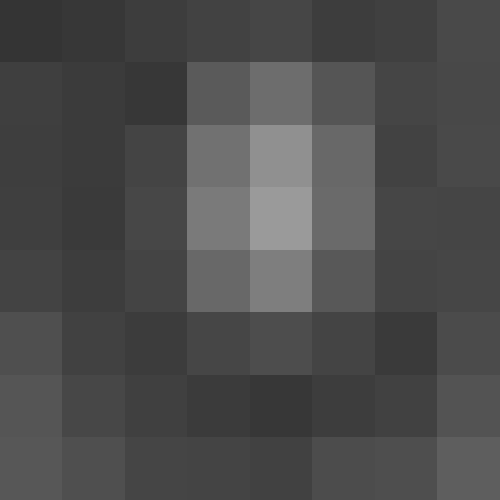

In [2]:
# Define a test array of 64 values
# This array will be used to test our algorithm, before we start working on real images
I = np.array([[52, 55, 61, 66, 70, 61, 64, 73],
                  [63, 59, 55, 90, 109 ,85, 69, 72],
                  [62, 59, 68, 113, 144, 104, 66, 73],
                  [63, 58, 71, 122, 154, 106, 70, 69],
                  [67, 61, 68, 104, 126, 88, 68, 70],
                  [79, 65, 60, 70, 77, 68, 58, 75],
                  [85, 71, 64, 59, 55, 61, 65, 83],
                  [87, 79, 69, 68, 65, 76, 78, 94]])

show_arr(I)

## Compression
### Compression step 1: DCT spectrum computation

In the first step, we compute the DCT 8x8 matrix.\
We call this matrix `D8`\
$$
D_8=\frac{1}{2}
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
\cos{\frac{\pi}{16}} & \cos{\frac{3\pi}{16}} & \cos{\frac{5\pi}{16}} & \cos{\frac{7\pi}{16}} & \cos{\frac{9\pi}{16}} & \cos{\frac{11\pi}{16}} & \cos{\frac{13\pi}{16}} & \cos{\frac{15\pi}{16}} \\
\cos{\frac{2\pi}{16}} & \cos{\frac{6\pi}{16}} & \cos{\frac{10\pi}{16}} & \cos{\frac{14\pi}{16}} & \cos{\frac{18\pi}{16}} & \cos{\frac{22\pi}{16}} & \cos{\frac{26\pi}{16}} & \cos{\frac{30\pi}{16}} \\
\cos{\frac{3\pi}{16}} & \cos{\frac{9\pi}{16}} & \cos{\frac{15\pi}{16}} & \cos{\frac{21\pi}{16}} & \cos{\frac{27\pi}{16}} & \cos{\frac{33\pi}{16}} & \cos{\frac{39\pi}{16}} & \cos{\frac{45\pi}{16}} \\
\cos{\frac{4\pi}{16}} & \cos{\frac{12\pi}{16}} & \cos{\frac{20\pi}{16}} & \cos{\frac{28\pi}{16}} & \cos{\frac{36\pi}{16}} & \cos{\frac{44\pi}{16}} & \cos{\frac{52\pi}{16}} & \cos{\frac{60\pi}{16}} \\
\cos{\frac{5\pi}{16}} & \cos{\frac{15\pi}{16}} & \cos{\frac{25\pi}{16}} & \cos{\frac{35\pi}{16}} & \cos{\frac{45\pi}{16}} & \cos{\frac{55\pi}{16}} & \cos{\frac{65\pi}{16}} & \cos{\frac{75\pi}{16}} \\
\cos{\frac{6\pi}{16}} & \cos{\frac{18\pi}{16}} & \cos{\frac{30\pi}{16}} & \cos{\frac{42\pi}{16}} & \cos{\frac{54\pi}{16}} & \cos{\frac{66\pi}{16}} & \cos{\frac{78\pi}{16}} & \cos{\frac{90\pi}{16}} \\
\cos{\frac{7\pi}{16}} & \cos{\frac{21\pi}{16}} & \cos{\frac{35\pi}{16}} & \cos{\frac{49\pi}{16}} & \cos{\frac{63\pi}{16}} & \cos{\frac{77\pi}{16}} & \cos{\frac{91\pi}{16}} & \cos{\frac{105\pi}{16}} \\
\end{pmatrix}
$$

In other word,
$$
D_8[0, j] = \frac{1}{2\sqrt{2}}\\
D_8[i, j] = \frac{\cos(\pi * (i + 2 * i * j))}{2}
$$

Entries of `D8` are floating point numbers

In [3]:
def create_D8():
    D8 = np.zeros((8,8), dtype = float)
    D8[0,:] = 1 / np.sqrt(2)

    for i in range(1, 8):
        for j in range(8):
            D8[i,j] = np.cos(np.pi * (i + 2 * i * j) / 16)

    D8 /= 2
    return D8

D8 = create_D8()
D8

array([[ 0.35355339,  0.35355339,  0.35355339,  0.35355339,  0.35355339,
         0.35355339,  0.35355339,  0.35355339],
       [ 0.49039264,  0.41573481,  0.27778512,  0.09754516, -0.09754516,
        -0.27778512, -0.41573481, -0.49039264],
       [ 0.46193977,  0.19134172, -0.19134172, -0.46193977, -0.46193977,
        -0.19134172,  0.19134172,  0.46193977],
       [ 0.41573481, -0.09754516, -0.49039264, -0.27778512,  0.27778512,
         0.49039264,  0.09754516, -0.41573481],
       [ 0.35355339, -0.35355339, -0.35355339,  0.35355339,  0.35355339,
        -0.35355339, -0.35355339,  0.35355339],
       [ 0.27778512, -0.49039264,  0.09754516,  0.41573481, -0.41573481,
        -0.09754516,  0.49039264, -0.27778512],
       [ 0.19134172, -0.46193977,  0.46193977, -0.19134172, -0.19134172,
         0.46193977, -0.46193977,  0.19134172],
       [ 0.09754516, -0.27778512,  0.41573481, -0.49039264,  0.49039264,
        -0.41573481,  0.27778512, -0.09754516]])

Then, we compute the DCT spectrum of the 8x8 matrix `I` with the DCT matrix `D8`.

We shift values by -128 to apply the DCT on `I` centered on its mean value. 

$$DCT(I - 128) = J = D_8(I - 128)D_8^T$$

Finally, we round the DCT spectrum. This is the first step of a lossy compression


In [4]:
J = D8 @ (I - 128) @ D8.T
J

array([[-4.15375000e+02, -3.01857173e+01, -6.11970620e+01,
         2.72393225e+01,  5.61250000e+01, -2.00951738e+01,
        -2.38764710e+00,  4.61815442e-01],
       [ 4.46552370e+00, -2.18574393e+01, -6.07580381e+01,
         1.02536368e+01,  1.31451101e+01, -7.08741801e+00,
        -8.53543671e+00,  4.87688850e+00],
       [-4.68344847e+01,  7.37059735e+00,  7.71293876e+01,
        -2.45619822e+01, -2.89116884e+01,  9.93352095e+00,
         5.41681547e+00, -5.64895086e+00],
       [-4.85349667e+01,  1.20683609e+01,  3.40997672e+01,
        -1.47594111e+01, -1.02406068e+01,  6.29596744e+00,
         1.83116505e+00,  1.94593651e+00],
       [ 1.21250000e+01, -6.55344993e+00, -1.31961210e+01,
        -3.95142773e+00, -1.87500000e+00,  1.74528445e+00,
        -2.78722825e+00,  3.13528230e+00],
       [-7.73474368e+00,  2.90546138e+00,  2.37979576e+00,
        -5.93931394e+00, -2.37779671e+00,  9.41391596e-01,
         4.30371334e+00,  1.84869103e+00],
       [-1.03067401e+00,  1.830674

In [5]:
J = np.around(J).astype(int)
J

array([[-415,  -30,  -61,   27,   56,  -20,   -2,    0],
       [   4,  -22,  -61,   10,   13,   -7,   -9,    5],
       [ -47,    7,   77,  -25,  -29,   10,    5,   -6],
       [ -49,   12,   34,  -15,  -10,    6,    2,    2],
       [  12,   -7,  -13,   -4,   -2,    2,   -3,    3],
       [  -8,    3,    2,   -6,   -2,    1,    4,    2],
       [  -1,    0,    0,   -2,   -1,   -3,    4,   -1],
       [   0,    0,   -1,   -4,   -1,    0,    1,    2]])

### Compression step 2: Quantize
We first need to create the matrix `Q`. It is possible to set a precision that will influence the compression level of the algorithm.
The default precision is 50. The compression gets more accurate when the precision gets higher. However, a high precision involve a lower compression.

In [6]:
def create_Q(q = 50):
    Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                  [12, 12, 14, 19, 26, 58, 60, 55],
                  [14, 13, 16, 24, 40, 57, 69, 56],
                  [14, 17, 22, 29, 51, 87, 80, 62],
                  [18, 22, 37, 56, 68, 109, 103, 77],
                  [24, 35, 55, 64, 81, 104, 113, 92],
                  [49, 64, 78, 87, 103, 121, 120, 101],
                  [72, 92, 95, 98, 112, 100, 103, 99]])
    
    if q < 50:
        alpha = 5000 / q
    else:
        alpha = 200 - (2 * q)
        
    Q = (alpha * Q + 50) / 100
    Q = np.floor(Q).astype(int)
    
    return Q


Q = create_Q()
Q

array([[ 16,  11,  10,  16,  24,  40,  51,  61],
       [ 12,  12,  14,  19,  26,  58,  60,  55],
       [ 14,  13,  16,  24,  40,  57,  69,  56],
       [ 14,  17,  22,  29,  51,  87,  80,  62],
       [ 18,  22,  37,  56,  68, 109, 103,  77],
       [ 24,  35,  55,  64,  81, 104, 113,  92],
       [ 49,  64,  78,  87, 103, 121, 120, 101],
       [ 72,  92,  95,  98, 112, 100, 103,  99]])

The DCT spectrum `J` is quantized by the quantification matrix `Q`.

$$K = \lfloor J . Q\rceil$$ with . as the element-wise division

Note: The result is rounded again.

In [7]:
K = J / Q
K = np.around(K).astype(int)

K

array([[-26,  -3,  -6,   2,   2,   0,   0,   0],
       [  0,  -2,  -4,   1,   0,   0,   0,   0],
       [ -3,   1,   5,  -1,  -1,   0,   0,   0],
       [ -4,   1,   2,  -1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

### Compression step 3: Linearize
It is time to take our matrix and transform it into a simple list, with the "zig-zag" format.

In [8]:
def zigzag(K):
    flippedK = K[::-1,:]
    zig = np.zeros((0), dtype = int)
    for k in range(1-K.shape[0], K.shape[0]):
        diagonalK = np.diagonal(flippedK, k)
        if k % 2 == 0:
            diagonalK = diagonalK[::-1]
        zig = np.concatenate([zig, diagonalK])
    return zig
    
zig = zigzag(K)
zig

array([-26,  -3,   0,  -3,  -2,  -6,   2,  -4,   1,  -4,   1,   1,   5,
         1,   2,   0,   0,  -1,   2,   0,   0,   0,   0,   0,  -1,  -1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

The array we get from the zig zag algorithm usually ends by a lot of 0. We can eliminate them to gain space.

In [41]:
def eliminate_zero(zig):
    zero_count = len(zig)
    for i in range(len(zig) - 1, -1, -1):
        if zig[i] != 0:
            zero_count = len(zig) - i - 1
            break

    return zig[:len(zig) - zero_count]

zig_without_zero = eliminate_zero(zig)
print("Ratio: ",  len(zig) / len(zig_without_zero))

Ratio:  2.4615384615384617


This is the end of the compression process. To recap, there are 3 steps to compress a 8x8 image:
   * DCT spectrum computation
   * Quantization
   * Linearization
   
At the end of the process, we obtain a list of numbers that doesn't end by 0. Our 8x8 image is compressed into that list. In the JPEG compression algorithm, we are supposed to use huffman in the linearization step. We ignore this last step.

The compression ratio is: $$ ratio_{compression} = \frac{length(zig\_zag)}{length(I)} = \frac{length(zig\_zag)}{64}$$ with the eliminated 0s zig_zag

In our example 8x8 image `I`m

### Decompression step 1: Recreating the matrix

We first add back the trailings 0. This is simple because we know exactly how many 0 have been removed, since the original matrix contains 64 values.

Then, we need to recreate the 8x8 matrix from the list of values.

In [10]:
def read_zero(zig_without_zero):
    _zig = np.zeros((64), dtype=int)
    _zig[:len(zig_without_zero)] = zig_without_zero
    return _zig

_zig = read_zero(zig_without_zero)
_zig

array([-26,  -3,   0,  -3,  -2,  -6,   2,  -4,   1,  -4,   1,   1,   5,
         1,   2,   0,   0,  -1,   2,   0,   0,   0,   0,   0,  -1,  -1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [11]:
def zigzag_reverse(_zig):
    _K = np.zeros((8,8), dtype=int)
    x, y = 0, 0
    down = True
    # x -> column
    # y -> row
    maxY, maxX = _K.shape
    for v in _zig:
        _K[x, y] = v
        if down:
            x -= 1
            y += 1
            if x < 0:
                down = False
                x += 1
            if y >= maxY:
                down = False
                x += 2
                y -= 1
        else:
            x += 1
            y -= 1
            if x >= maxX:
                down = True
                x -= 1
                y += 2
            if y < 0:
                down = True
                y += 1
    return _K

_K = zigzag_reverse(_zig)
_K

array([[-26,  -3,  -6,   2,   2,   0,   0,   0],
       [  0,  -2,  -4,   1,   0,   0,   0,   0],
       [ -3,   1,   5,  -1,  -1,   0,   0,   0],
       [ -4,   1,   2,  -1,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

### Decompression step 3: TODO
TODO

In [12]:
_J = _K * Q
_J

array([[-416,  -33,  -60,   32,   48,    0,    0,    0],
       [   0,  -24,  -56,   19,    0,    0,    0,    0],
       [ -42,   13,   80,  -24,  -40,    0,    0,    0],
       [ -56,   17,   44,  -29,    0,    0,    0,    0],
       [  18,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0]])

In [13]:
_I = (D8.T @ _J @ D8) + 128


### Time to see the results!
Now we have the compression and the decompression, let's see our result.
We will define a function to display an array.

Let's see the original array:

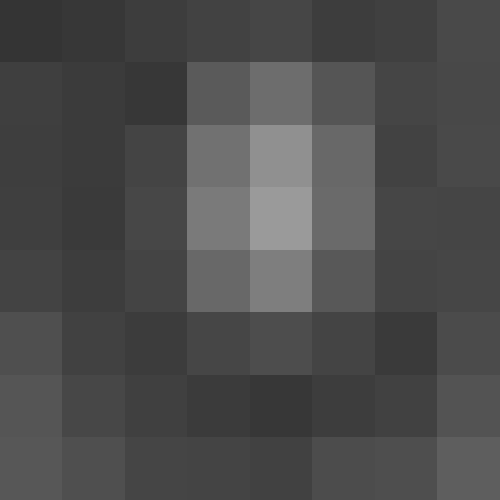

In [14]:
show_arr(I)

In [15]:
I

array([[ 52,  55,  61,  66,  70,  61,  64,  73],
       [ 63,  59,  55,  90, 109,  85,  69,  72],
       [ 62,  59,  68, 113, 144, 104,  66,  73],
       [ 63,  58,  71, 122, 154, 106,  70,  69],
       [ 67,  61,  68, 104, 126,  88,  68,  70],
       [ 79,  65,  60,  70,  77,  68,  58,  75],
       [ 85,  71,  64,  59,  55,  61,  65,  83],
       [ 87,  79,  69,  68,  65,  76,  78,  94]])

And the one we compressed:

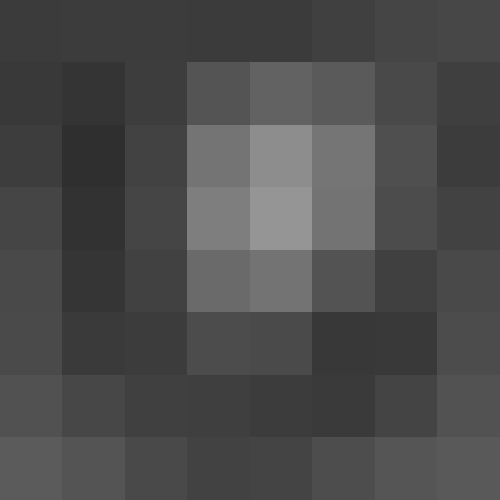

In [16]:
show_arr(_I)

In [17]:
_I

array([[ 59.53600012,  60.88612722,  60.78742912,  59.2773395 ,
         59.90382799,  64.08191242,  69.01345141,  71.78923396],
       [ 57.71514823,  52.78415377,  61.6126308 ,  84.72169533,
         98.47694098,  90.291222  ,  73.49597995,  63.62235796],
       [ 61.40312959,  47.92584165,  66.22544309, 116.35086565,
        141.70943524, 117.14979544,  79.07723159,  60.5627253 ],
       [ 69.40423568,  50.12737124,  69.87488216, 126.79392839,
        149.56979994, 115.30599074,  76.99777766,  66.80057639],
       [ 73.43195578,  53.70162947,  65.75032514, 106.33854362,
        115.3479698 ,  83.89551918,  64.95963034,  73.45115352],
       [ 74.7933654 ,  58.99665507,  60.05674643,  76.38593875,
         74.22396066,  56.0608229 ,  57.58985604,  76.94865962],
       [ 81.81932002,  71.241129  ,  64.18445834,  63.61493012,
         60.91001116,  58.89064701,  68.41738693,  82.74151598],
       [ 91.35877166,  84.23265155,  73.66664225,  66.66361834,
         68.49875031,  77.109065 

Let's take a look at the difference now:

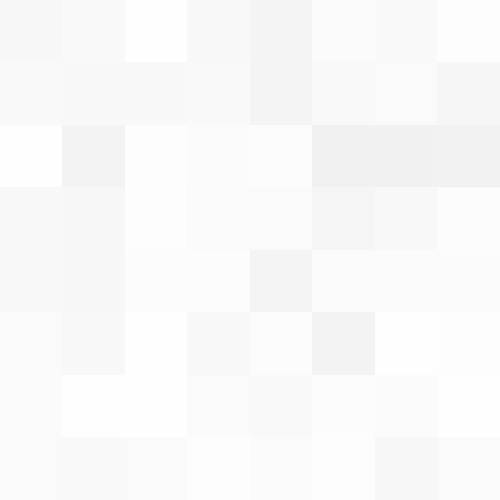

In [18]:
show_arr(255 - np.abs(I - _I))

# Part 2: Full black and white image
Now we can compress and decompress 8x8 blocks. But images are usually not 8x8 images. Our algorithm is fantastic, but needs a bit more to be really usable. Let's improve it to be able to compress full black and white images.

In [19]:
# Load an image in black and white, remove its alpha channel and returns it as a numpy array
def load_grayscale(path):
    im = Image.open(path).convert('LA')
    arr = np.array(im)
    arr = arr[:,:,:-1]
    return arr[:,:,0]

## Compression

### Compression step 1: Separates chunks
Our first step once the image is loaded is to separate it in several blocks of 8x8. Since the image is not always in dimensions that are multiple of 8, we will need to add padding at the end of the last chunks to make sure every chunk is full.

In [20]:
# Return a numpy array containing chunks of 8x8 pixels (It is then an x*y*8*8 array) and the dimensions of the image
def separateChuncks(array, chunk_size = 8):
    # Chunks dimensions
    (arrX, arrY) = array.shape
    (x, y) = (int(np.ceil(arrX / chunk_size)), int(np.ceil(arrY / chunk_size)))
    
    # Create the chunks array
    chunks = np.zeros((x, y, chunk_size, chunk_size))
    
    # Iterate chunk
    for (i, j) in np.ndindex(x, y):
        # The point we start from in array
        (startX, startY) = (i * chunk_size, j * chunk_size)
        
        # The limit of the chunk for the padding
        (clipX, clipY) = (arrX % chunk_size if startX + chunk_size > arrX else chunk_size, arrY % chunk_size if startY + chunk_size > arrY else chunk_size)
        
        # Copy the 8x8 chunk
        chunks[i, j][:clipX, :clipY] = array[startX:startX + clipX, startY:startY + clipY]
        
    return (chunks, (arrX, arrY))

### Compression step 2: Compress the chunks
Here we will apply the functions created in part 1 to a single chunk...

In [21]:
def compressChunk(chunk, D8, Q):
    J = D8 @ (chunk - 128) @ D8.T
    J = np.around(J).astype(int)
    K = J / Q
    K = np.around(K).astype(int)
    zig = zigzag(K)
    zig_without_zero = eliminate_zero(zig)
    ratio = 0
    if len(zig_without_zero) != 0:
        ratio = len(zig) / len(zig_without_zero)
    return zig_without_zero, ratio

... and do it for every chunk.
We put everything in a ``compress`` function to be more easily used.

In [22]:
def compress(arr, quality = 50):
    D8 = create_D8()
    Q = create_Q(quality)
    chunks, dimensions = separateChuncks(arr)
    x, y, _, _ = chunks.shape
    zigs = []
    for (i, j) in np.ndindex(x, y):
        if i >= len(zigs):
            zigs.append([])
        zig_without_zero, ratio = compressChunk(chunks[i][j], D8, Q)
        zigs[i].append(zig_without_zero)
    return zigs, dimensions

## Decompression

### Decompression step 1: combine chunks
In order to finish the decompression, we will need to combine the different chunks into a single matrix.

In [23]:
# Recreate the original array from chunks
def combineChunks(chunks, dimensions, chunk_size = 8):
    # Array outputed
    array = np.empty(dimensions)
    
    for (i, j, cx, cy) in np.ndindex(chunks.shape):
        # Coordinate of the pixel
        (x, y) = i * chunk_size + cx, j * chunk_size + cy
        if (x < dimensions[0] and y < dimensions[1]):
            array[x, y] = chunks[i, j, cx, cy]
    
    return array

### Decompression step 2: decompress everything
Let's do the opposite operations of ``compress`` in a ``decompress`` function.

In [24]:
def decompress(zigs, dimensions, quality = 50):
    D8 = create_D8()
    Q = create_Q(quality)
    x = len(zigs)
    y = len(zigs[0])
    chunks = np.zeros((x, y, 8, 8))
    for (i, j) in np.ndindex(x, y):
        _zig = read_zero(zigs[i][j])
        _K = zigzag_reverse(_zig)
        _J = _K * Q
        _arr88 = (D8.T @ _J @ D8) + 128
        _arr88[_arr88 > 255] = 255
        _arr88[_arr88 < 0] = 0
        chunks[i][j] = _arr88
    _arr = combineChunks(chunks, dimensions)
    return _arr
        

### Time to see the results!
Let's try it on an image to see how it works!

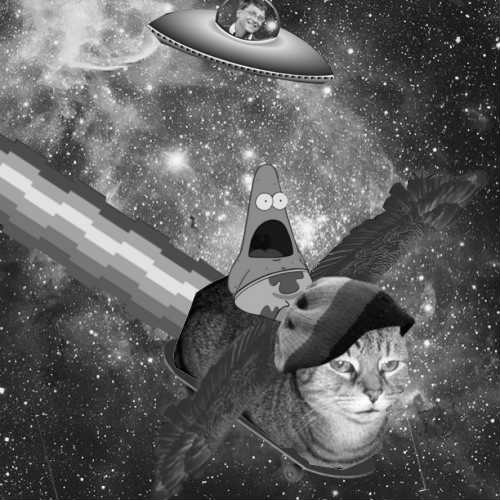

In [25]:
path = "randompic_color.png"
arr = load_grayscale(path)
zigs, dimensions = compress(arr)
_arr = decompress(zigs, dimensions)
show_arr(_arr)

And the error:

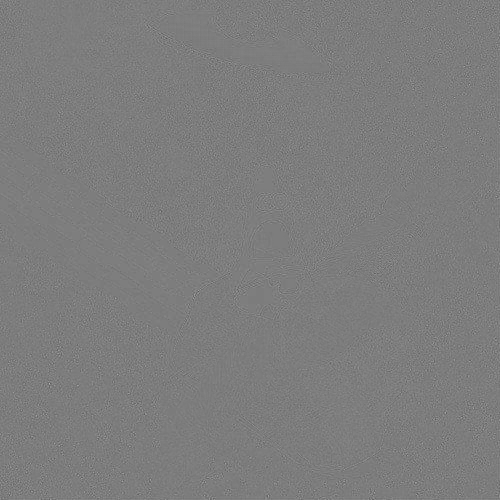

In [26]:
arr = load_grayscale(path)
show_arr(125 + arr - _arr)

# Part 3: Colors

In [27]:
def load_rgb(path):
    im = Image.open(path)
    arr = np.array(im)
    return arr[:,:,0], arr[:,:,1], arr[:,:,2]
 
arr_r, arr_g, arr_b = load_rgb(path)

# compress red
zigs_r, dimension = compress(arr_r)
_arr_r = decompress(zigs_r, dimensions)

# compress green
zigs_g, dimension = compress(arr_g)
_arr_g = decompress(zigs_g, dimensions)

# compress blue
zigs_b, dimension = compress(arr_b)
_arr_b = decompress(zigs_b, dimensions)

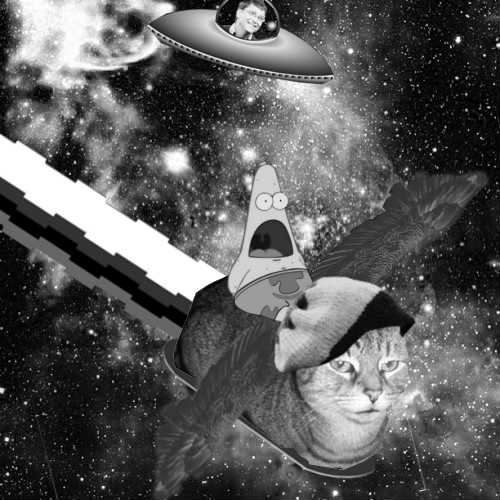

In [28]:
show_arr(_arr_r) # red

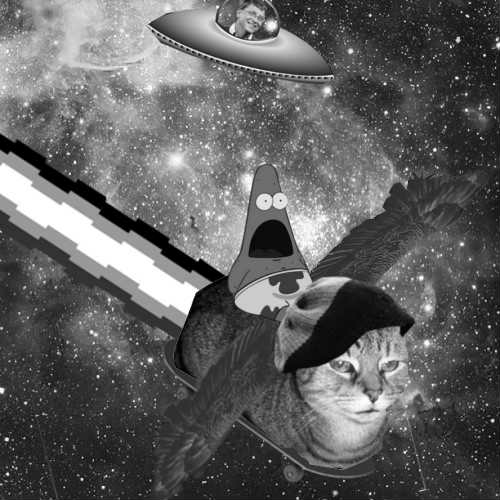

In [29]:
show_arr(_arr_g) # green

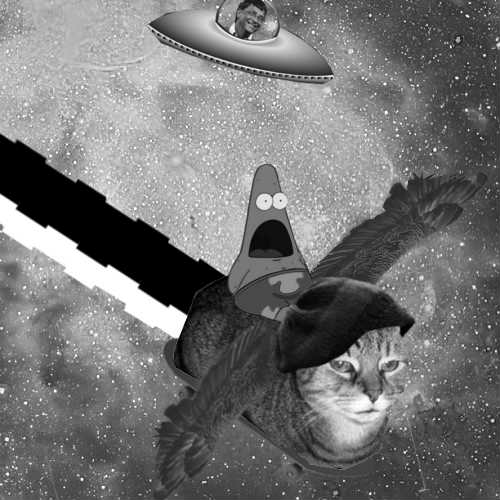

In [30]:
show_arr(_arr_b) # blue

In [31]:
def show_rgb(arr_r, arr_g, arr_b):
    x, y = arr_r.shape
    arr2 = np.zeros((x, y, 4), dtype = int)
    arr2[:,:,0] = arr_r[:,:]
    arr2[:,:,1] = arr_g[:,:]
    arr2[:,:,2] = arr_b[:,:]
    arr2[:,:,3] = 255
    if x == 8 and y == 8: # resize chunk
        return Image.fromarray(np.uint8(arr2)).resize((500,500), Image.NEAREST)
    else:
        return Image.fromarray(np.uint8(arr2))

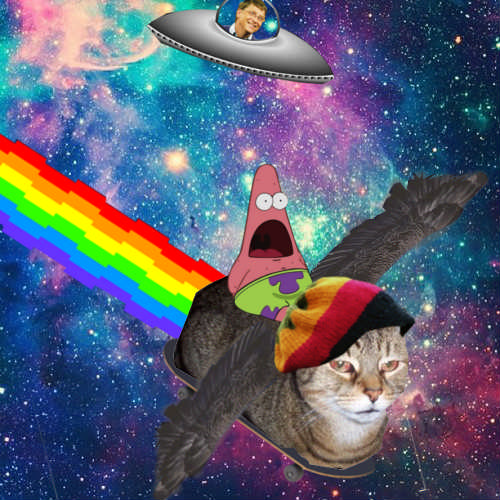

In [32]:
show_rgb(_arr_r, _arr_g, _arr_b)

In [33]:
RGB_TO_YUV = np.array([[0.299, 0.587, 0.114],
                       [-0.14713, -0.28886, 0.436],
                       [0.615, -0.51499, -0.10001]])
                       
YUV_TO_RGB = np.array([[1, 0, 1.13983],
                       [1, -0.39465, -0.58060],
                       [1, 2.03211, 0]])

def load_yuv(path):
    im = Image.open(path)
    arr = np.array(im)
    arr = arr[:,:,:-1]
    x, y, _ = arr.shape
    yuv = np.empty((x, y, 3))
    for (i, j) in np.ndindex(x, y):
        yuv[i, j, :] = RGB_TO_YUV @ arr[i,j,:]
    return yuv[:,:,0], yuv[:,:,1], yuv[:,:,2]

def rgb_from_yuv(arr_y, arr_u, arr_v):
    x, y = arr_y.shape
    yuv = np.empty((x, y, 3))
    yuv[:,:,0] = arr_y
    yuv[:,:,1] = arr_u
    yuv[:,:,2] = arr_v
    rgb = np.empty((x, y, 3))
    for (i, j) in np.ndindex(x, y):
        rgb[i, j, :] = YUV_TO_RGB @ yuv[i,j,:]
    return rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]

arr_y, arr_u, arr_v = load_yuv(path)

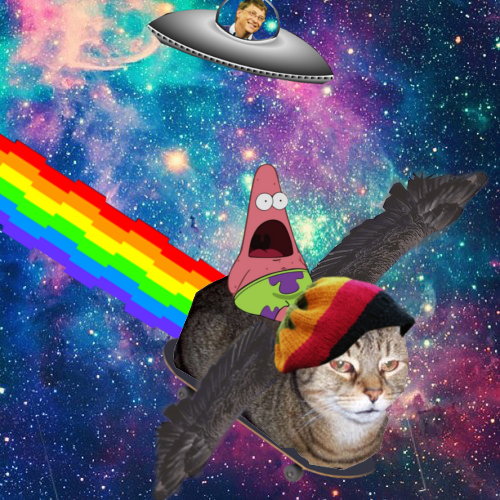

In [34]:
arr_r, arr_g, arr_b = rgb_from_yuv(arr_y, arr_u, arr_v)
show_rgb(arr_r, arr_g, arr_b)

In [35]:
def resize(arr, x, y):
    return arr
    # axis_y rows
    # axis_x columns
    res = np.zeros((arr.shape[0], arr.shape[1], 2), dtype = int)
    res[:,:,0] = arr[:,:]
    res[:,:,1] = 255
    im = Image.fromarray(np.uint8(res)).resize((x, y))
    res = np.array(im)
    res = res[:,:,0]
    return res

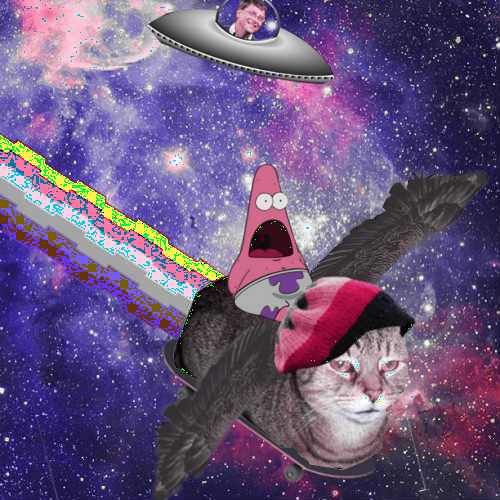

In [36]:
# resize 4:2:2



# Resize U, V
arr_u_resized = resize(arr_u, int(arr_u.shape[0] / 2), arr_u.shape[1])
arr_v_resized = resize(arr_v, int(arr_v.shape[0] / 2), arr_v.shape[1])

# compress Y
zigs_y, dimension = compress(arr_y)
_arr_y = decompress(zigs_y, dimension)

# compress U
zigs_u, dimension = compress(arr_u_resized)
_arr_u_resized = decompress(zigs_u, dimension)

# compress V
zigs_v, dimension = compress(arr_v_resized)
_arr_v_resized = decompress(zigs_v, dimension)

_arr_u = resize(_arr_u_resized, _arr_y.shape[0], _arr_y.shape[1])
_arr_v = resize(_arr_v_resized, _arr_y.shape[0], _arr_y.shape[1])

show_rgb(*rgb_from_yuv(_arr_y, _arr_u, _arr_v))

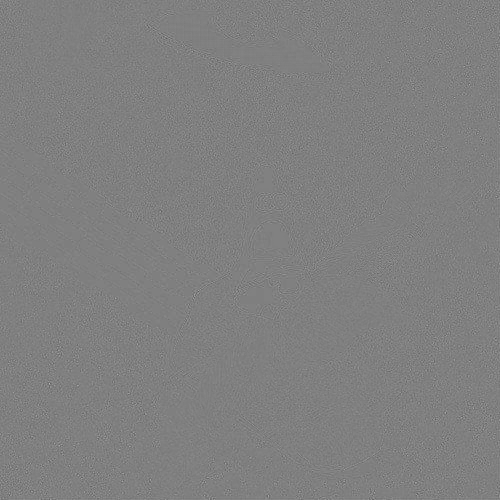

In [37]:
show_arr(arr_y - _arr_y + 128)

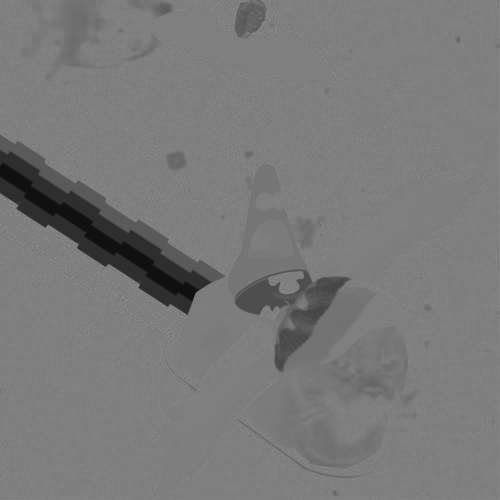

In [38]:
show_arr(arr_u - _arr_u + 128)

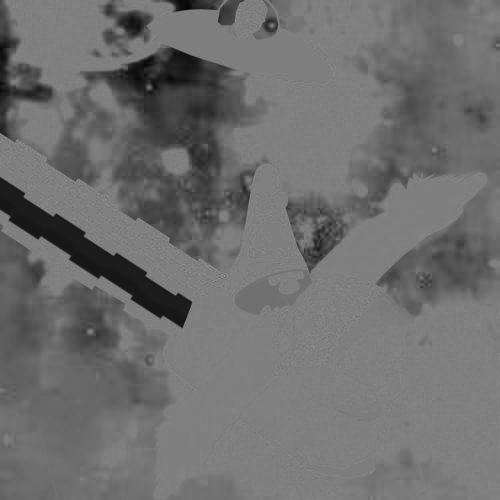

In [39]:
show_arr(arr_v - _arr_v + 128)